In [1]:
from tensorboard.backend.event_processing import event_accumulator
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
plt.style.use('default') 
parent_dir = Path('.').resolve().parent

In [2]:

env = 'noise'
agent = 'log_normal'
lots = 20 
name = f'{parent_dir}/tensorboard_logs/{env}_{lots}_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_{agent}'
# name = f'{parent_dir}/tensorboard_logs/{env}_{lots}_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_{agent}_learn_std'
event_dir = Path(name)
event_file = max(event_dir.glob('**/events.out.tfevents.*'), key=lambda f: f.stat().st_mtime)
print(event_file)
event_file = str(event_file)
ea = event_accumulator.EventAccumulator(event_file,
                                         size_guidance={
                                             event_accumulator.SCALARS: 0,
                                             event_accumulator.IMAGES: 0,
                                             event_accumulator.AUDIO: 0,
                                             event_accumulator.HISTOGRAMS: 0,
                                         })

/u/weim/lob/tensorboard_logs/noise_20_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_log_normal/events.out.tfevents.1761854292.ada-27.1814721.0


In [5]:
import datetime
lots_list = [20, 60]
textwidth = 6.75
textheight = 9
scale = 3.2

parent_dir = Path('.').resolve().parent
translator = {'log_normal': 'LN', 'dirichlet': 'DR'}

list_of_dfs = []
for env in ['noise', 'flow', 'strategic']:
    data_for_df = {}
    for agent in ['log_normal', 'dirichlet']:
        short_name = translator[agent]
        data_for_df[short_name] = []
        for lots in [20, 60]:            
            name = f'{parent_dir}/tensorboard_logs/{env}_{lots}_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_{agent}'
            event_dir = Path(name)
            event_file = max(event_dir.glob('**/events.out.tfevents.*'), key=lambda f: f.stat().st_mtime)
            # print(event_file)
            event_file = str(event_file)
            ea = event_accumulator.EventAccumulator(event_file,
                                                    size_guidance={
                                                        event_accumulator.SCALARS: 0,
                                                    event_accumulator.IMAGES: 0,
                                                    event_accumulator.AUDIO: 0,
                                                    event_accumulator.HISTOGRAMS: 0,
                                                    })            
            ea.Reload()  
            start = ea.Scalars('charts/time')[0].wall_time
            end = ea.Scalars('charts/time')[-1].wall_time
            time = datetime.timedelta(seconds=end - start)
            # print(time)
            total_seconds = time.total_seconds()
            hours = int(total_seconds // 3600)
            minutes = int((total_seconds % 3600) // 60)
            data_for_df[short_name].append(f"{hours}:{minutes:02d}")
    df = pd.DataFrame.from_dict(data_for_df).round(2)
    index_name = [f'{env}_{lots}' for lots in [20, 60]]
    df.index = index_name
    print(df)
    list_of_dfs.append(df)
final_df = pd.concat(list_of_dfs, axis=0)
print(final_df)
final_df.insert(0, 'Market', '')
final_df.iloc[:, 0] = ['Noise', '', 'Noise \& Tactical', '', 'Noise \& Tactical', '\& Strategic']
print(final_df)

latex_table = final_df.to_latex(float_format="%.2f", index=False, column_format='l'+'c'*2, escape=False)
saving_path = f"{parent_dir}/latex_tables/training_times.tex" 
tag="training_times"
with open(saving_path, "w") as f:
    content = (
        r"\begin{table}[htpb]"+
        r"\label{table:" + tag +"}"+
        r"\begin{center}"+
        r"    \begin{scriptsize}"+
        r"        \begin{sc}"
        + latex_table +
        r"        \end{sc}"+
        r"    \end{scriptsize}"+
        r"\end{center}"+
        r"\end{table}"        
    )
    f.write(content)

                

            LN    DR
noise_20  1:28  1:35
noise_60  1:29  1:13
           LN    DR
flow_20  1:36  1:28
flow_60  1:43  1:19
                LN    DR
strategic_20  1:52  1:32
strategic_60  1:55  1:26
                LN    DR
noise_20      1:28  1:35
noise_60      1:29  1:13
flow_20       1:36  1:28
flow_60       1:43  1:19
strategic_20  1:52  1:32
strategic_60  1:55  1:26
                         Market    LN    DR
noise_20                  Noise  1:28  1:35
noise_60                         1:29  1:13
flow_20       Noise \& Tactical  1:36  1:28
flow_60                          1:43  1:19
strategic_20  Noise \& Tactical  1:52  1:32
strategic_60       \& Strategic  1:55  1:26


/u/weim/lob/tensorboard_logs/noise_20_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_log_normal/events.out.tfevents.1761854292.ada-27.1814721.0
/u/weim/lob/tensorboard_logs/noise_20_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_dirichlet/events.out.tfevents.1761891295.ada-27.2079080.0
/u/weim/lob/tensorboard_logs/noise_60_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_log_normal/events.out.tfevents.1761859715.ada-27.1860634.0
/u/weim/lob/tensorboard_logs/noise_60_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_dirichlet/events.out.tfevents.1761897112.ada-27.2117500.0


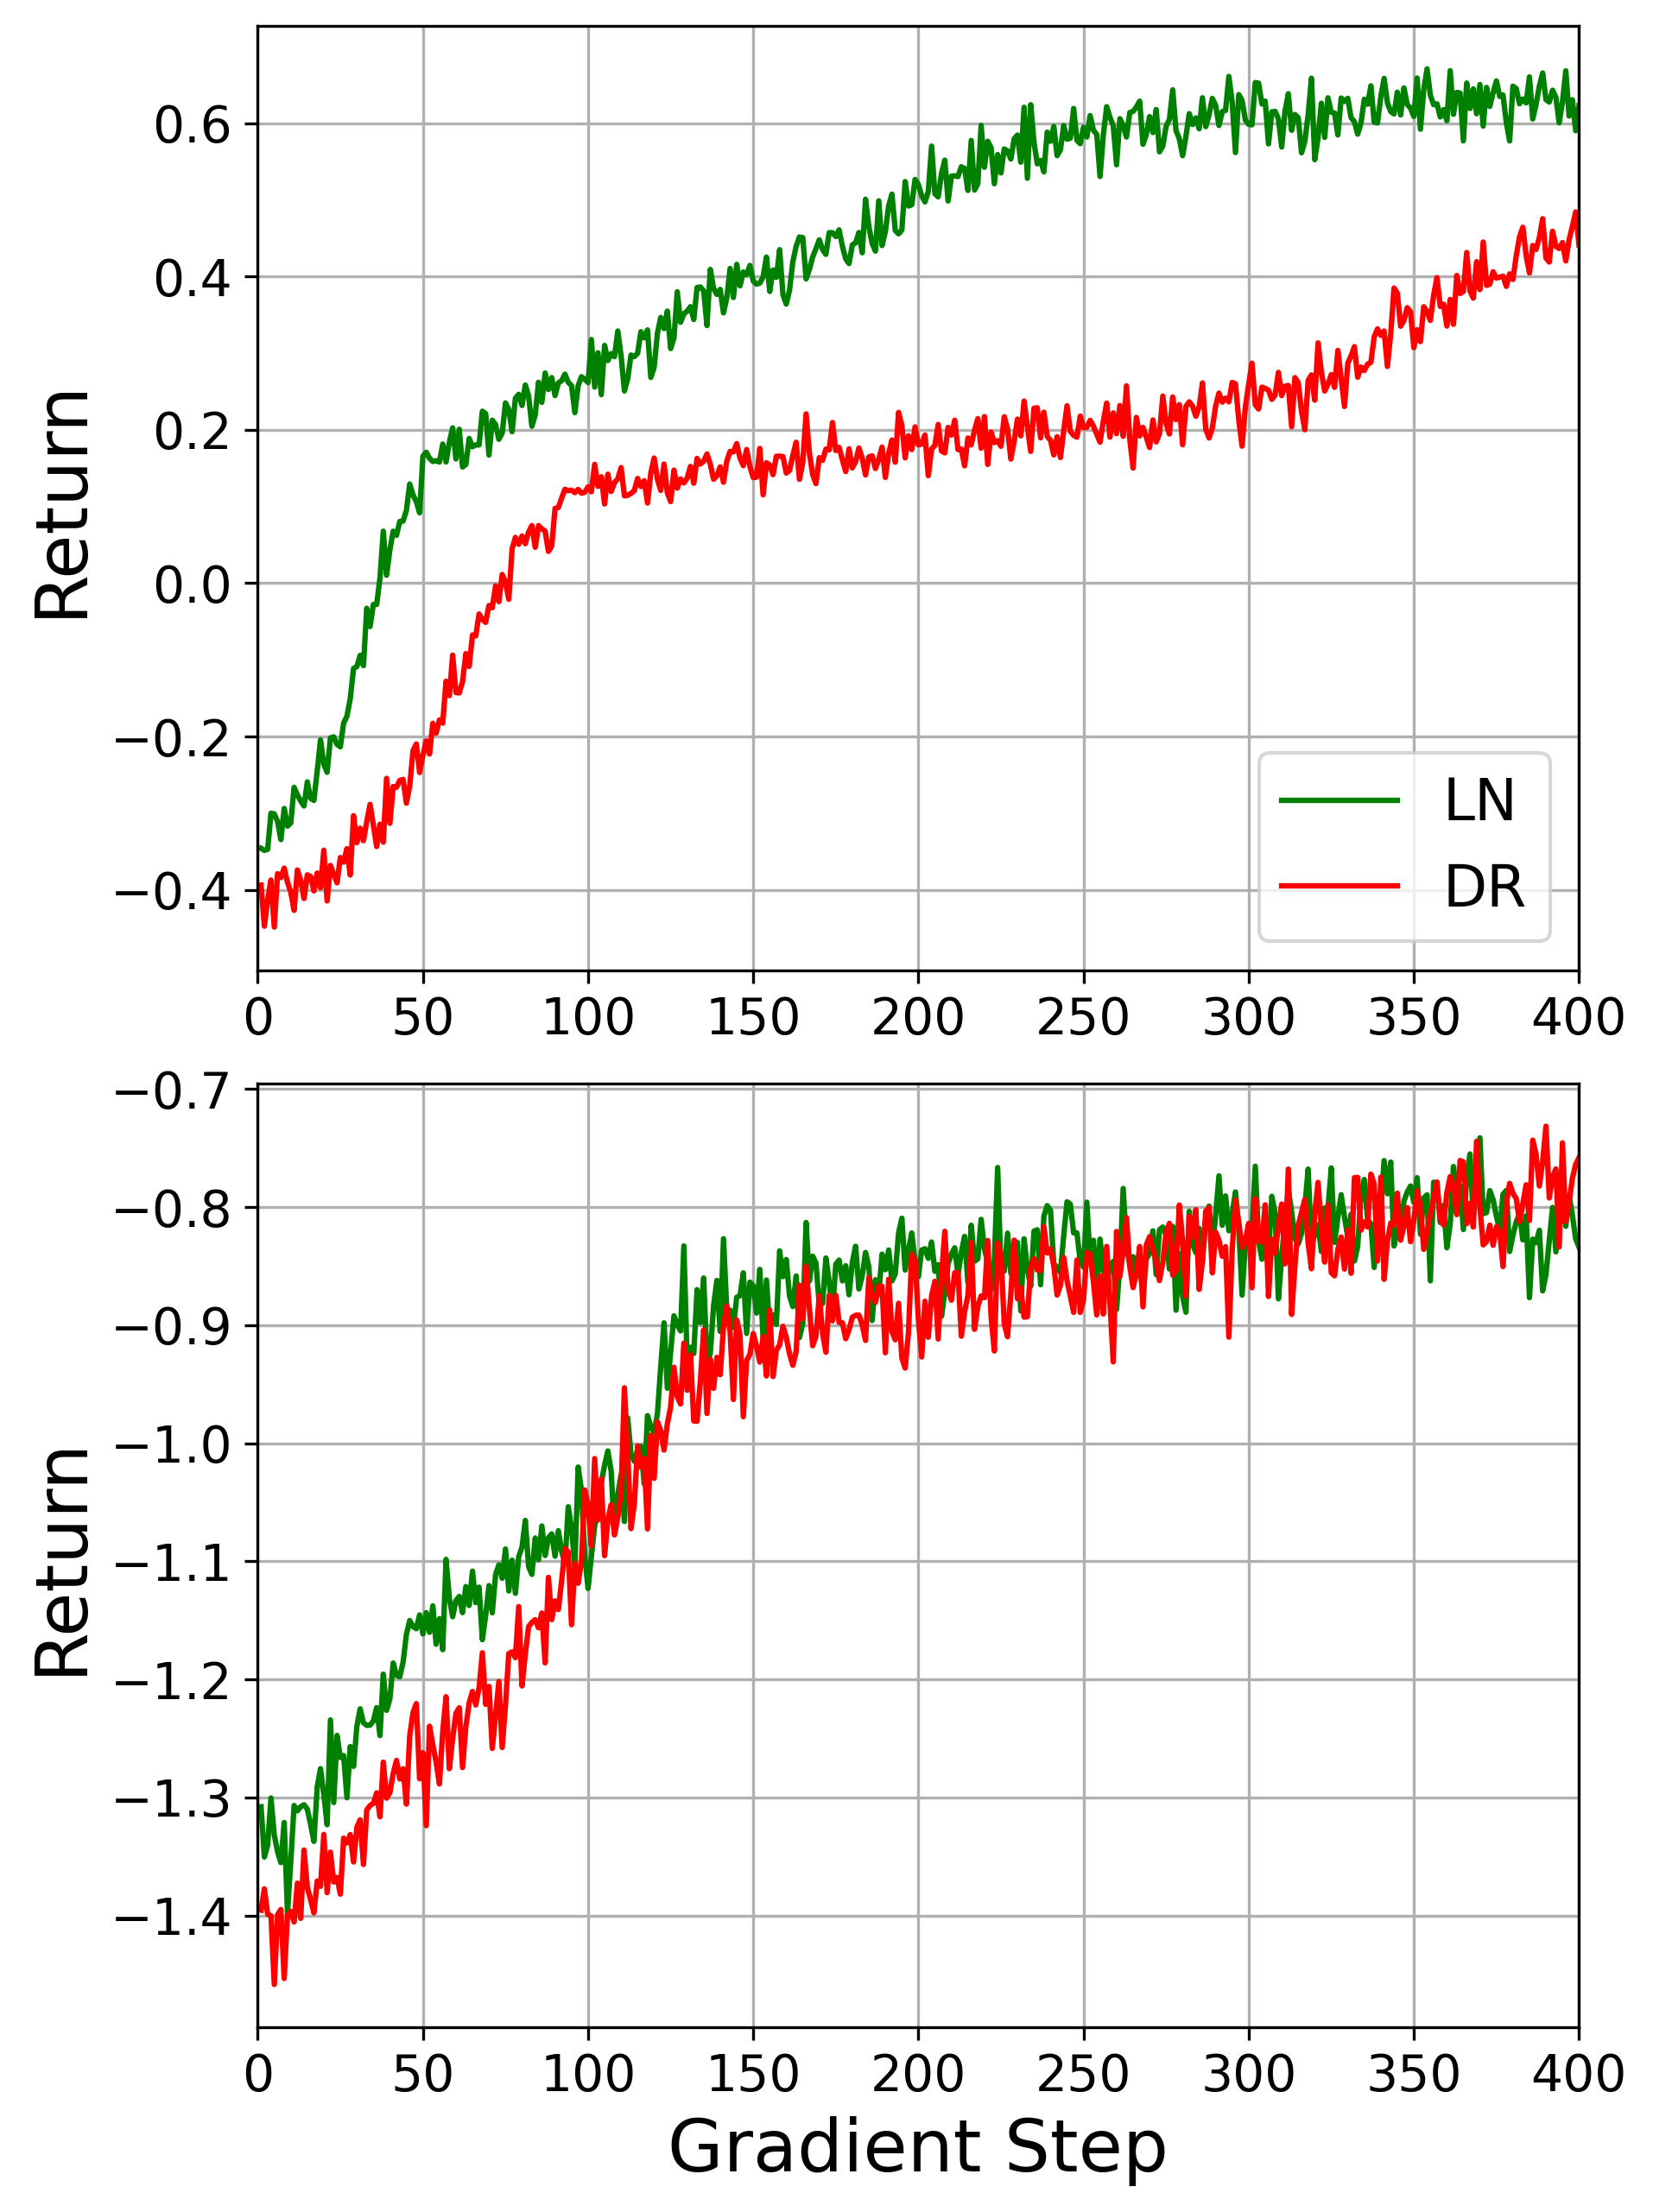

/u/weim/lob/tensorboard_logs/flow_20_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_log_normal/events.out.tfevents.1761865218.ada-27.1906511.0
/u/weim/lob/tensorboard_logs/flow_20_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_dirichlet/events.out.tfevents.1761901607.ada-27.2166519.0
/u/weim/lob/tensorboard_logs/flow_60_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_log_normal/events.out.tfevents.1761871096.ada-27.1953189.0
/u/weim/lob/tensorboard_logs/flow_60_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_dirichlet/events.out.tfevents.1761907005.ada-27.2220002.0


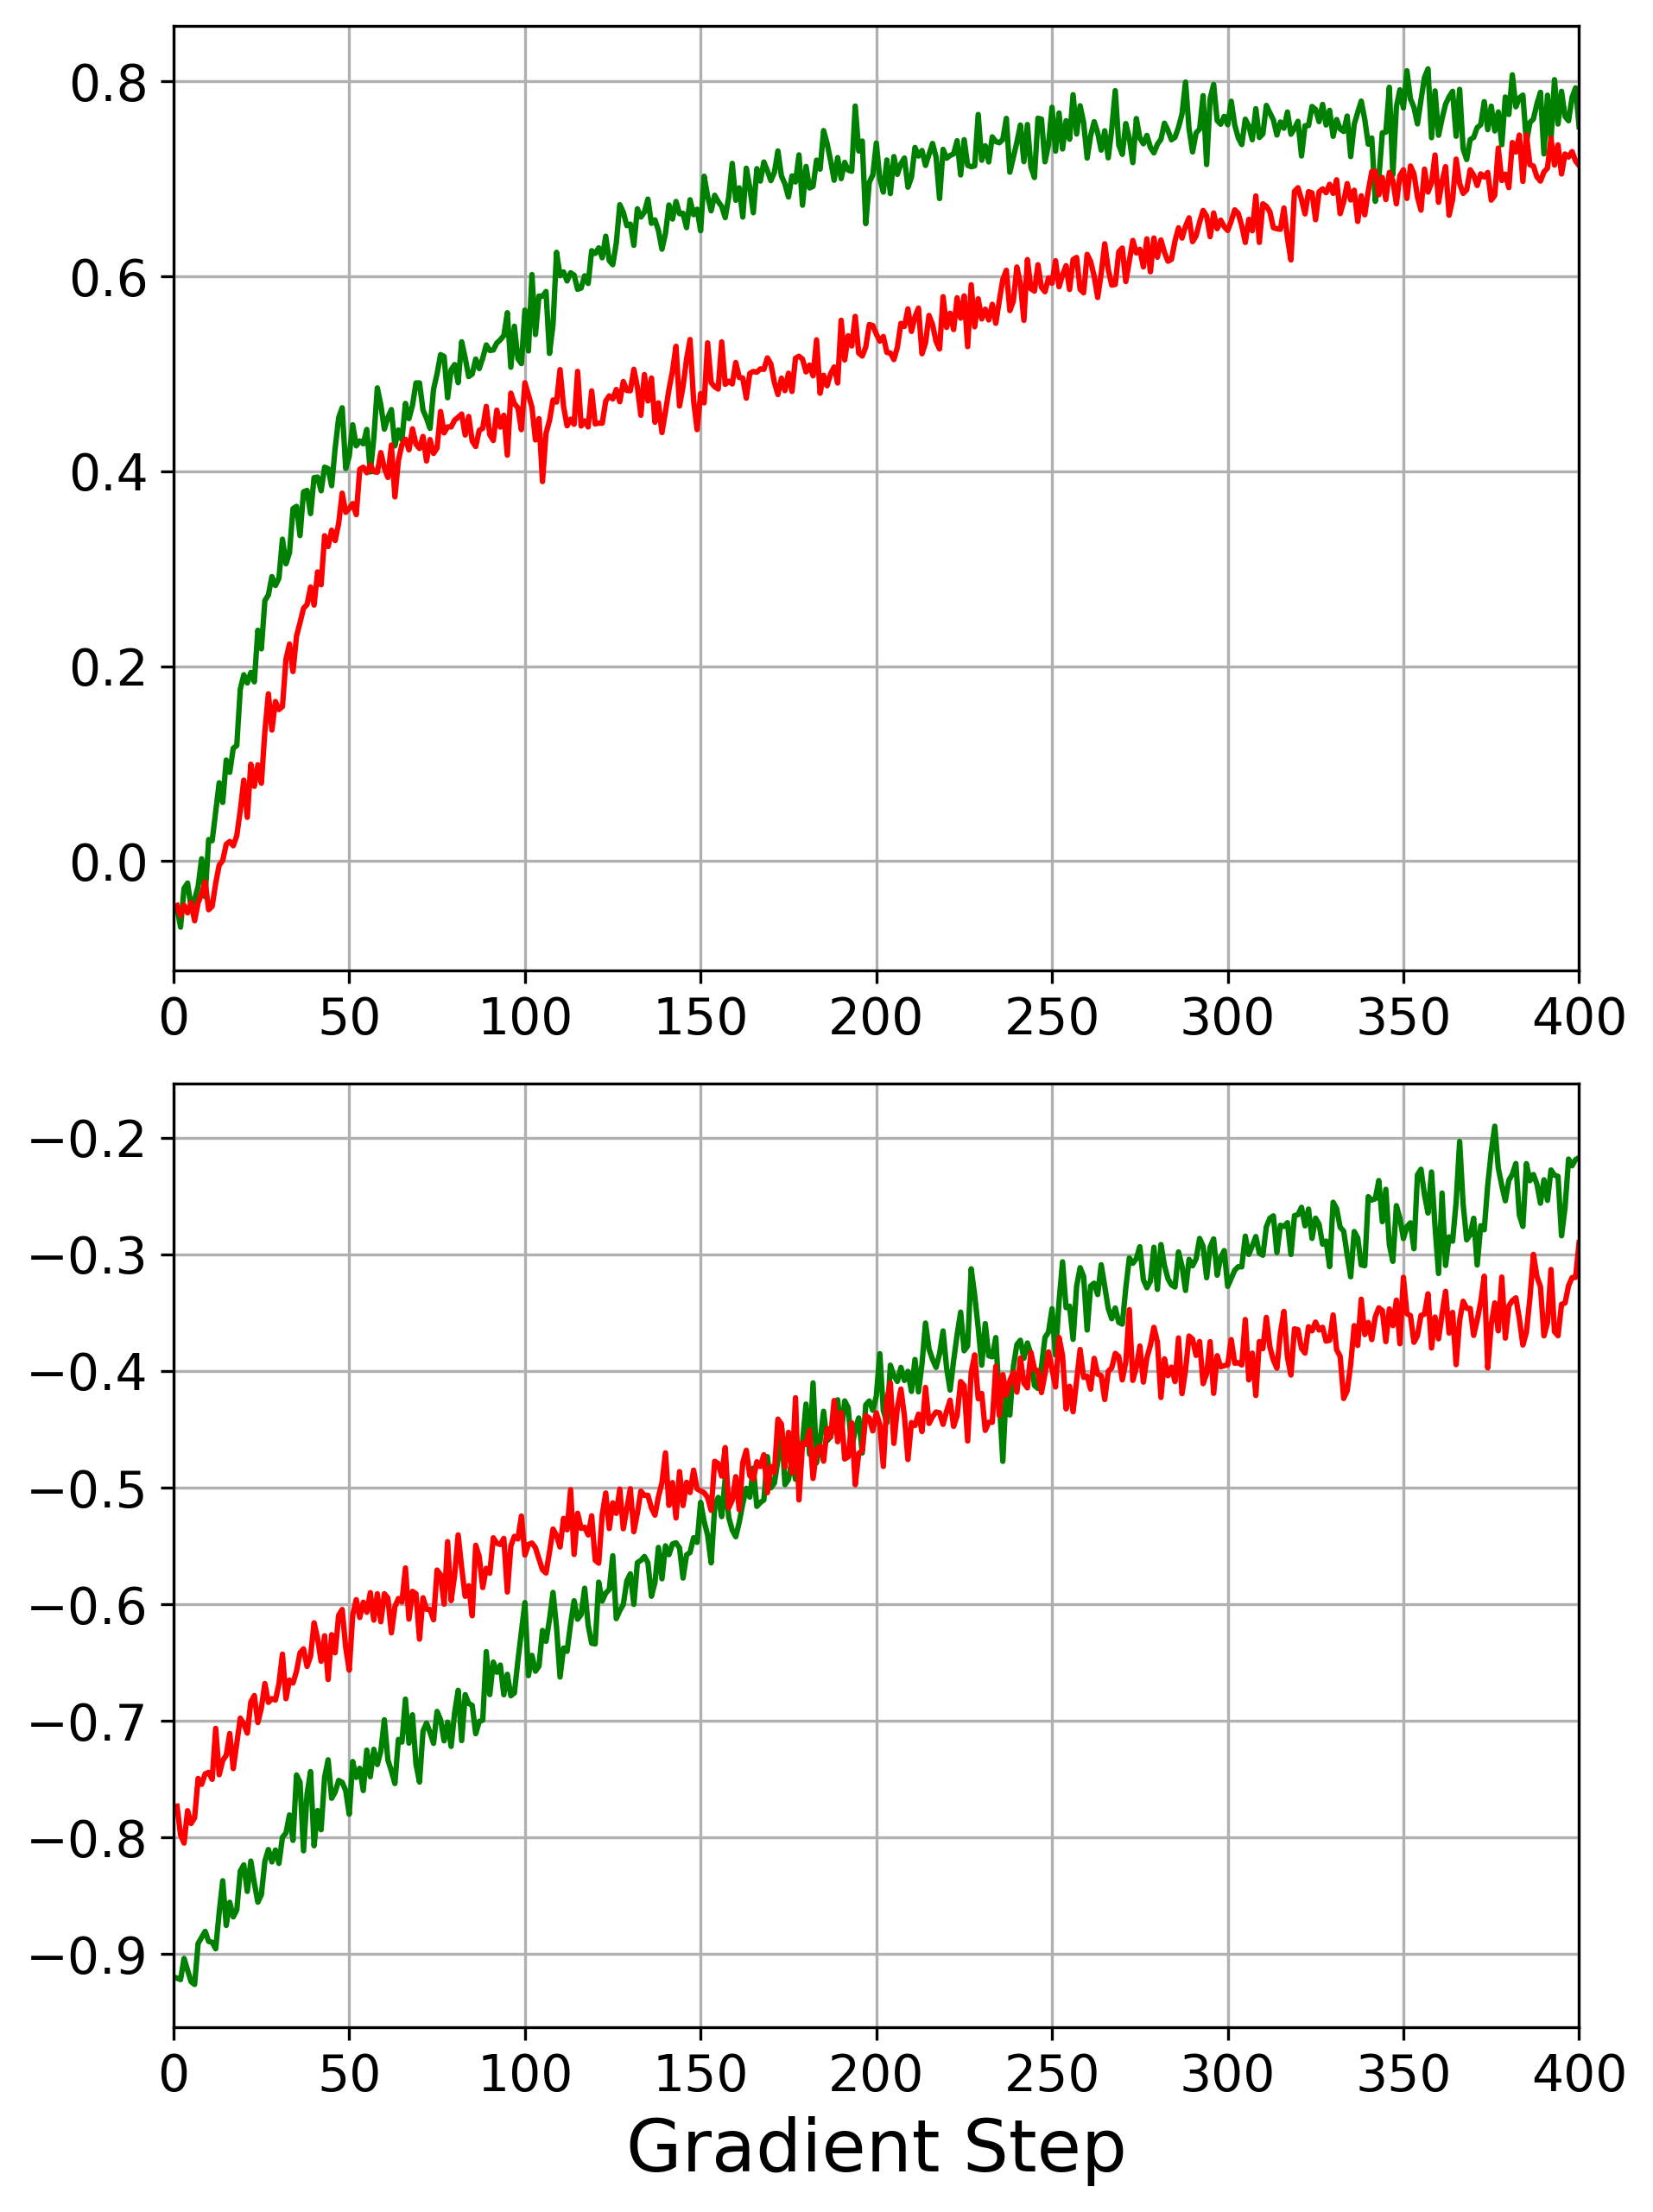

/u/weim/lob/tensorboard_logs/strategic_20_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_log_normal/events.out.tfevents.1761877405.ada-27.1992015.0
/u/weim/lob/tensorboard_logs/strategic_20_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_dirichlet/events.out.tfevents.1761911909.ada-27.2263554.0
/u/weim/lob/tensorboard_logs/strategic_60_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_log_normal/events.out.tfevents.1761884276.ada-27.2035248.0
/u/weim/lob/tensorboard_logs/strategic_60_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_dirichlet/events.out.tfevents.1761917591.ada-27.2327881.0


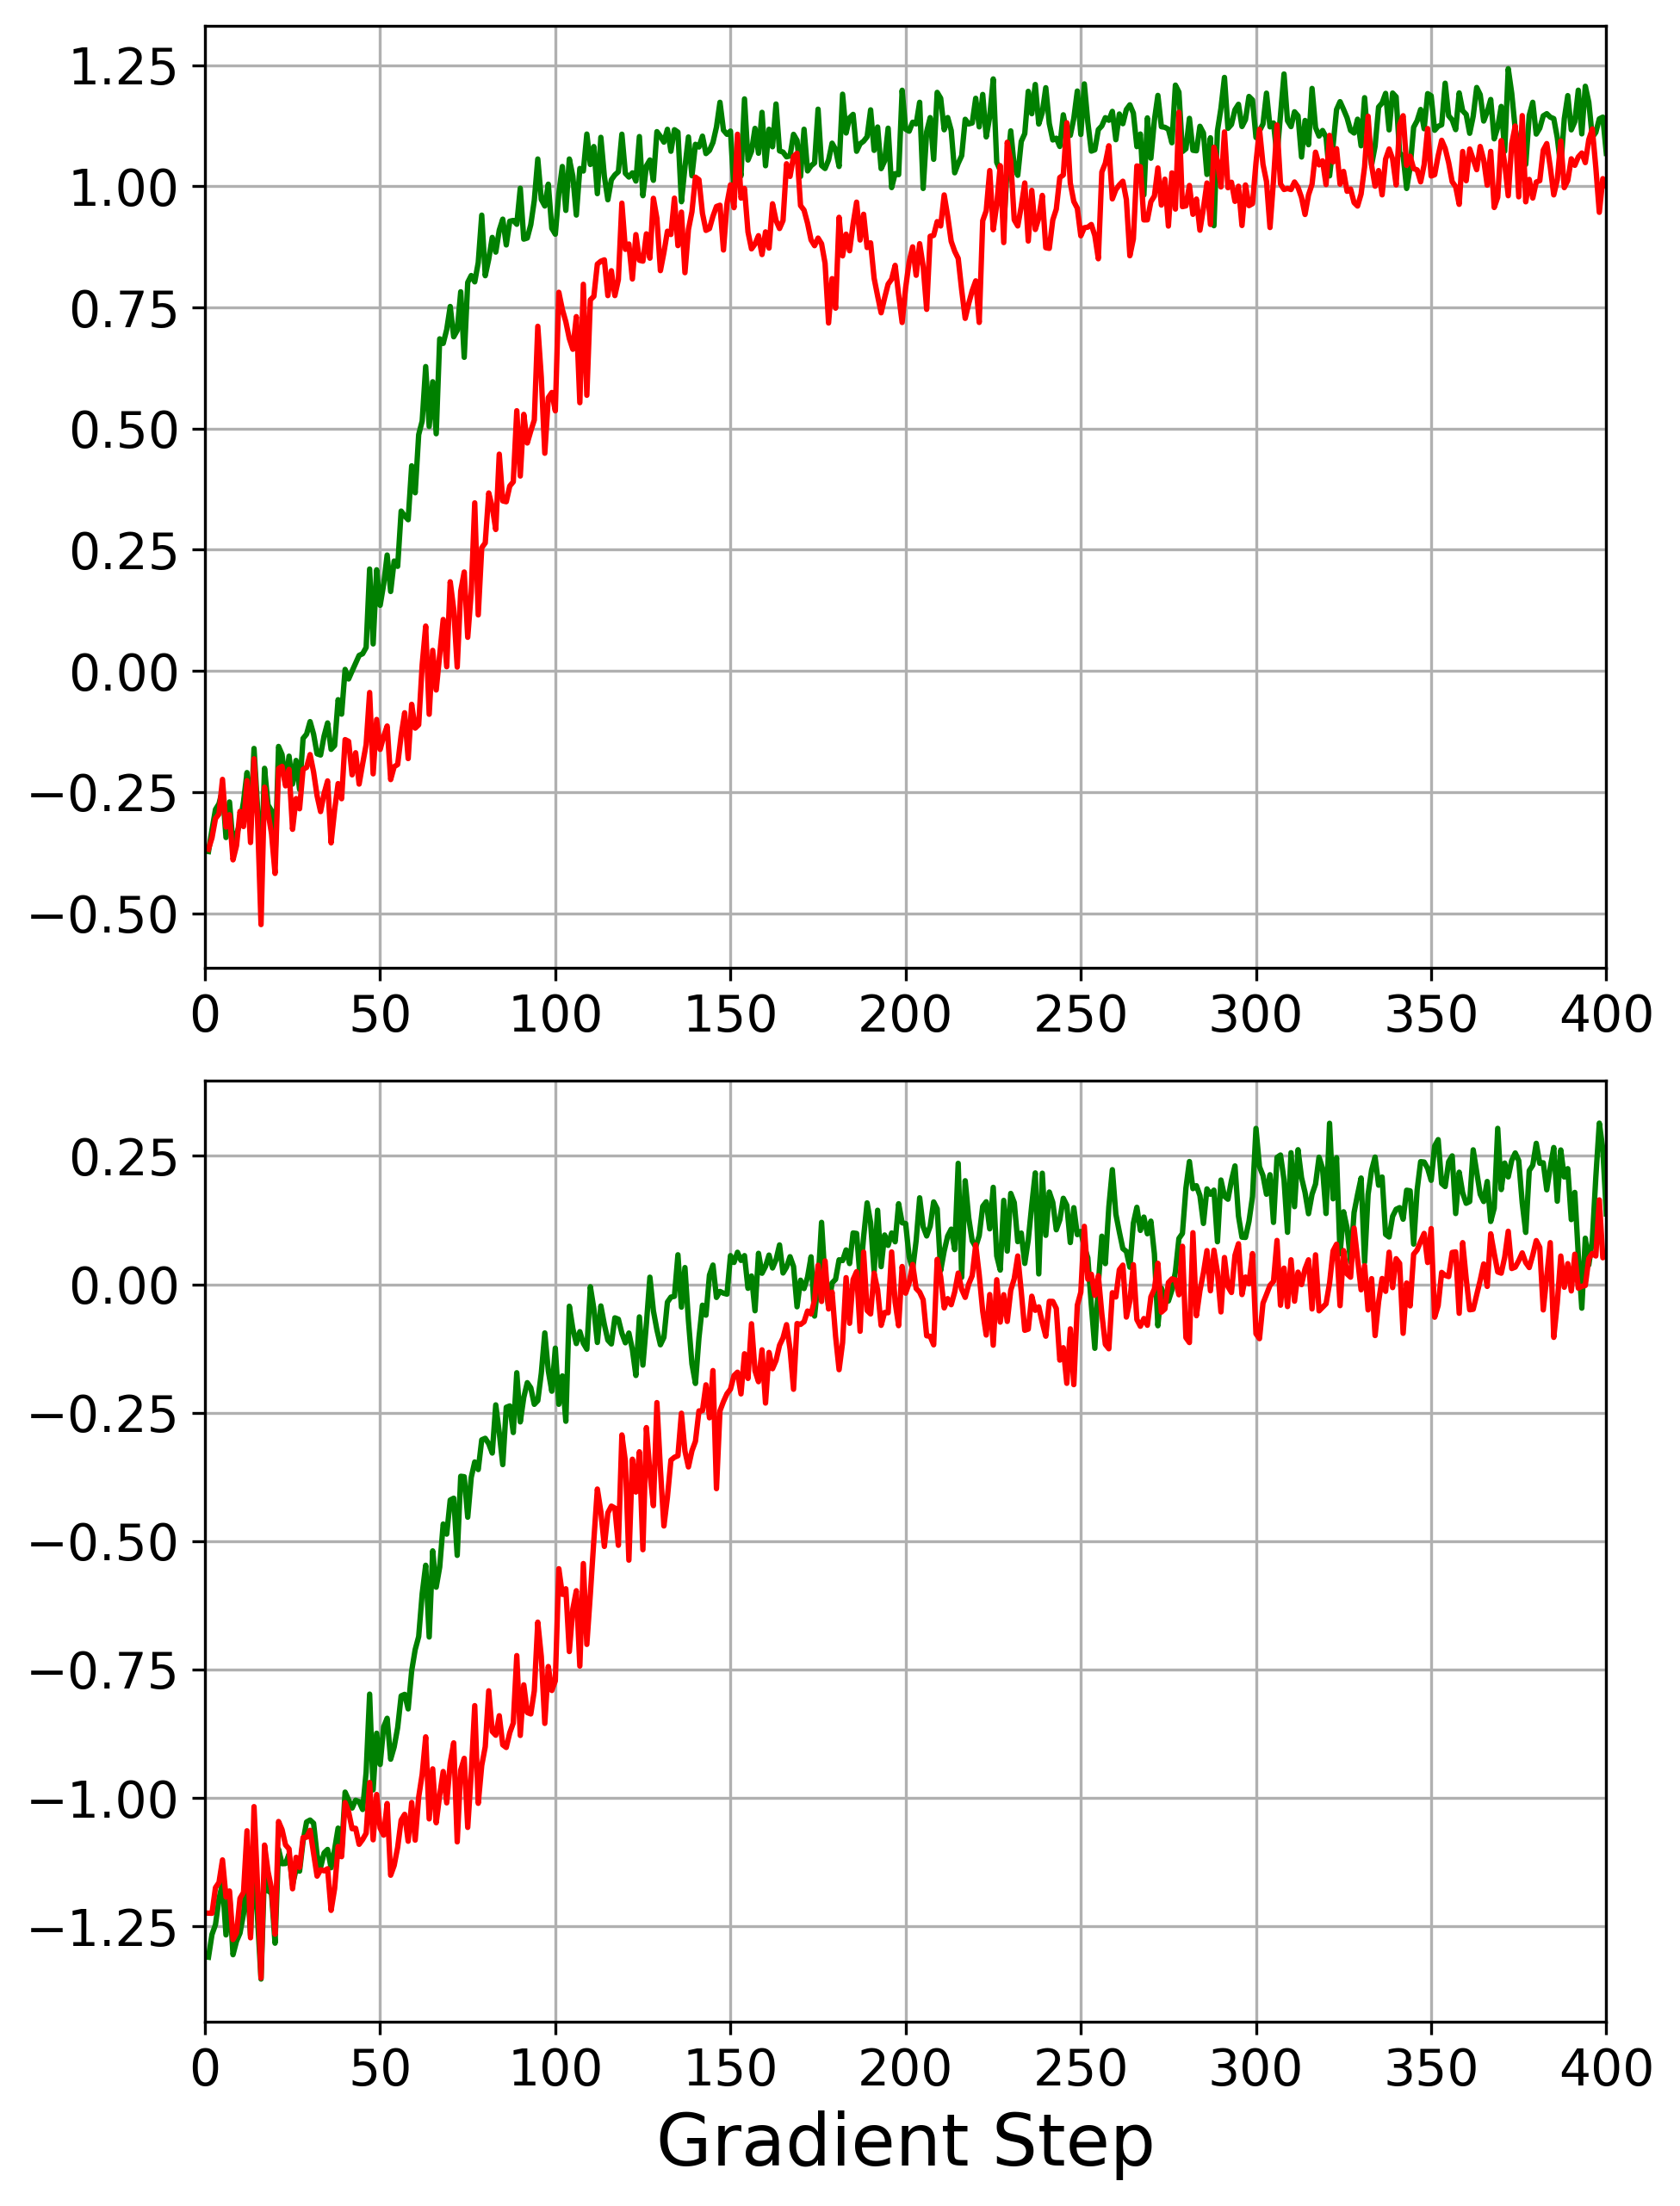

In [6]:
lots_list = [20, 60]
textwidth = 6.75
textheight = 9
scale = 3.2

parent_dir = Path('.').resolve().parent

for env in ['noise', 'flow', 'strategic']:
    fig, axs = plt.subplots(2, 1, figsize=(scale*0.3*textwidth, scale*0.3*textheight), dpi=300)
    idx = 0
    for lots in [20, 60]:
        for agent in ['log_normal', 'dirichlet']:
            name = f'{parent_dir}/tensorboard_logs/{env}_{lots}_seed_0_eval_seed_100_eval_episodes_10000_num_iterations_400_bsize_12800_{agent}'
            event_dir = Path(name)
            event_file = max(event_dir.glob('**/events.out.tfevents.*'), key=lambda f: f.stat().st_mtime)
            print(event_file)
            event_file = str(event_file)
            ea = event_accumulator.EventAccumulator(event_file,
                                                    size_guidance={
                                                        event_accumulator.SCALARS: 0,
                                                    event_accumulator.IMAGES: 0,
                                                    event_accumulator.AUDIO: 0,
                                                    event_accumulator.HISTOGRAMS: 0,
                                                })

            ea.Reload()  
            df = pd.DataFrame(ea.Scalars('charts/return'))
            translate_names = {'log_normal': 'LN', 'dirichlet': 'DR', 'log_normal_learn_std': 'LNS'}
            if agent == 'log_normal':
                color = 'green'
            if agent == 'dirichlet':
                color = 'red'
            if agent == 'log_normal_learn_std':
                color = 'blue'
            # divide by number of gradient steps and number of environments 
            df['step']= df['step']/ (100 * 128)
            axs[idx].plot(df['step'].values, df['value'].values, label=translate_names[agent], color=color)            
        if env == 'noise':
            axs[idx].set_ylabel('Return', fontsize=20)
        tick_size = 14
        axs[idx].tick_params(axis='x', labelsize=tick_size)
        axs[idx].tick_params(axis='y', labelsize=tick_size)
        axs[idx].set_xlim(left=0)
        axs[idx].set_xlim(right=max(df['step'].values))
        axs[idx].grid(True)
        if lots == 20 and env == 'noise':
            axs[idx].legend(loc='lower right', prop={'size': 16})
        if idx == 1:
            axs[idx].set_xlabel('Gradient Step', fontsize=20)
        idx += 1

    fig.tight_layout()
    fig.savefig(f'{parent_dir}/plots/{env}_return_convergence_learned_std.pdf', dpi=300)
    plt.show()
    plt.close(fig)